In [102]:
## LDO PMOS pass transistor Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

## Assumptions 
1. Vdd = 1.8V 
2. Vout_LDO = 1.2V
3. W/L unit = 1u/0.18u
4. M_scale = 1000

In [103]:
param_master = pd.read_csv("ldo_pmos_char.csv")

In [104]:
kgm_p = np.abs(param_master['kgmp Y'])
kcsg_p = np.abs(param_master['kcgs Y'])
kcgd_p = np.abs(param_master['kcgd Y'])
kgds_p = np.abs(param_master['kgds Y'])
ids = np.abs(param_master['ids Y'])
vgp = np.abs(param_master['kgmp X']) 

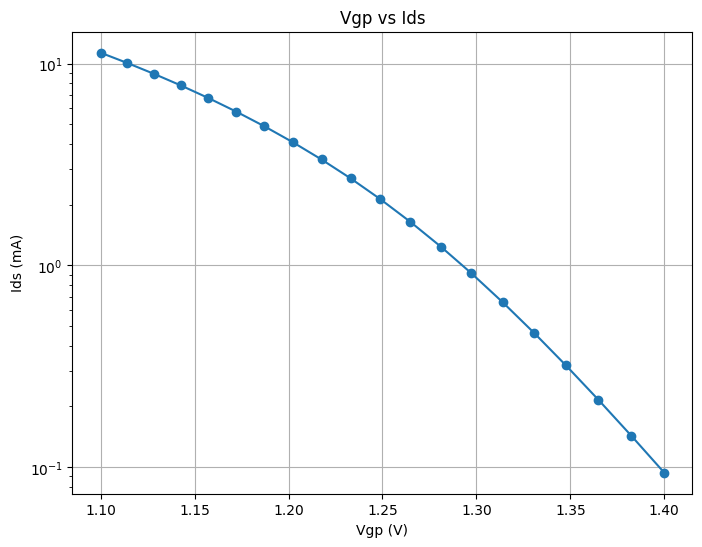

In [105]:
# plotting Ids vs Vgp
plt.figure(figsize=(8, 6))
plt.plot(vgp, ids * 1e3, marker='o')
plt.xlabel('Vgp (V)')
plt.ylabel('Ids (mA)')
plt.yscale('log')
plt.title('Vgp vs Ids')
plt.grid(True)
plt.show()

In [106]:

## find the voltage swing requirements based on max and min load current
I_max = 10e-3  # 10mA
I_min = 100e-6   # 100uA

# Interpolate to find the Vgp values corresponding to I_max and I_min

# ids and vgp are both increasing, so sort them for interpolation
sorted_idx = np.argsort(ids)
ids_sorted = ids.values[sorted_idx]
vgp_sorted = vgp.values[sorted_idx]

interp_func = interp1d(ids_sorted, vgp_sorted, kind='linear', fill_value='extrapolate')

vgp_I_max = float(interp_func(I_max))
vgp_I_min = float(interp_func(I_min))

print(f"Vgp for I_max ({I_max*1e3:.2f} mA): {vgp_I_max:.6f} V")
print(f"Vgp for I_min ({I_min*1e6:.2f} uA): {vgp_I_min:.6f} V")

Vgp_swing = np.abs(vgp_I_max - vgp_I_min)
print(f"Vgp Swing required: {Vgp_swing:.6f} V")

V_gp_cm = (vgp_I_max + vgp_I_min) / 2
print(f"Vgp Common Mode Voltage: {V_gp_cm:.6f} V")

Vgp for I_max (10.00 mA): 1.115024 V
Vgp for I_min (100.00 uA): 1.397810 V
Vgp Swing required: 0.282786 V
Vgp Common Mode Voltage: 1.256417 V


In [107]:
## Capacitance estimations at I_max 

C_Load = 100e-12  # 100pF

## Estimating cap values from kcgd

# Interpolate kcgd_p at vgp_I_max
kcgd_interp = interp1d(vgp, kcgd_p, kind='linear', fill_value='extrapolate')
cgd_p_max = float(kcgd_interp(vgp_I_max))*I_max  # in Farads
print(f"kcgd_p at Vgp for I_max ({vgp_I_max:.6f} V): {cgd_p_max*1e15:.3f} fF")

# Interpolate kcgs_p at vgp_I_max
kcgs_interp = interp1d(vgp, kcsg_p, kind='linear', fill_value='extrapolate')
cgs_p_max = float(kcgs_interp(vgp_I_max)) * I_max  # in Farads
print(f"kcgs_p at Vgp for I_max ({vgp_I_max:.6f} V): {cgs_p_max*1e15:.3f} fF")

# Interpolate kcds_p at vgp_I_max
kcds_p = np.abs(param_master['kcds Y'])
kcds_interp = interp1d(vgp, kcds_p, kind='linear', fill_value='extrapolate')
cds_p_max = float(kcds_interp(vgp_I_max)) * I_max  # in Farads
print(f"kcds_p at Vgp for I_max ({vgp_I_max:.6f} V): {cds_p_max*1e15:.3f} fF")

# Interpolte kgm_p at vgp_I_max
kgm_interp = interp1d(vgp, kgm_p, kind='linear', fill_value='extrapolate')
gm_p_max = float(kgm_interp(vgp_I_max)) * I_max  # in Siemens
print(f"gm_p at Vgp for I_max ({vgp_I_max:.6f} V): {gm_p_max*1e3:.3f} mS")

# Interpolte kgds_p at vgp_I_max
kgds_interp = interp1d(vgp, kgds_p, kind='linear', fill_value='extrapolate')
gds_p_max = float(kgds_interp(vgp_I_max)) * I_max  # in Siemens
print(f"gds_p at Vgp for I_max ({vgp_I_max:.6f} V): {gds_p_max*1e3:.3f} mS")


# Interpolate kcgd_p at vgp_I_min
cgd_p_min = float(kcgd_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcgd_p at Vgp for I_min ({vgp_I_min:.6f} V): {cgd_p_min*1e15:.3f} fF")

# Interpolate kcgs_p at vgp_I_min
cgs_p_min = float(kcgs_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcgs_p at Vgp for I_min ({vgp_I_min:.6f} V): {cgs_p_min*1e15:.3f} fF")

# Interpolate kcds_p at vgp_I_min
cds_p_min = float(kcds_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcds_p at Vgp for I_min ({vgp_I_min:.6f} V): {cds_p_min*1e15:.3f} fF")

# Interpolte kgm_p at vgp_I_min
gm_p_min = float(kgm_interp(vgp_I_min)) * I_min  # in Siemens
print(f"gm_p at Vgp for I_min ({vgp_I_min:.6f} V): {gm_p_min*1e3:.3f} mS")
# Interpolte kgds_p at vgp_I_min
gds_p_min = float(kgds_interp(vgp_I_min)) * I_min
print(f"gds_p at Vgp for I_min ({vgp_I_min:.6f} V): {gds_p_min*1e3:.3f} mS")  # in Siemens



kcgd_p at Vgp for I_max (1.115024 V): 430.919 fF
kcgs_p at Vgp for I_max (1.115024 V): 1052.641 fF
kcds_p at Vgp for I_max (1.115024 V): 0.886 fF
gm_p at Vgp for I_max (1.115024 V): 89.227 mS
gds_p at Vgp for I_max (1.115024 V): 3.343 mS
kcgd_p at Vgp for I_min (1.397810 V): 379.285 fF
kcgs_p at Vgp for I_min (1.397810 V): 491.892 fF
kcds_p at Vgp for I_min (1.397810 V): 0.076 fF
gm_p at Vgp for I_min (1.397810 V): 2.428 mS
gds_p at Vgp for I_min (1.397810 V): 0.054 mS


In [108]:
## Cap estimate 

Av = gm_p_max/gds_p_max

C_load_eff = C_Load + cgd_p_max*(1 + (1/Av)) + cds_p_max
print(f"Effective Load Capacitance: {C_load_eff*1e12:.3f} pF")

## Effective load capacitance including the Miller effect for the error amplifier
C_in = cgs_p_max + cgd_p_max*(1+Av)
print(f"Effective Input Capacitance including Miller effect: {C_in*1e12:.3f} pF")


Effective Load Capacitance: 100.448 pF
Effective Input Capacitance including Miller effect: 12.987 pF


In [109]:
# Capacitance and transconductance/gds estimates at I_min

Av_min = gm_p_min / gds_p_min

C_load_eff_min = C_Load + cgd_p_min * (1 + (1 / Av_min)) + cds_p_min
print(f"Effective Load Capacitance at I_min: {C_load_eff_min*1e12:.3f} pF")

C_in_min = cgs_p_min + cgd_p_min * (1 + Av_min)
print(f"Effective Input Capacitance at I_min including Miller effect: {C_in_min*1e12:.3f} pF")

Effective Load Capacitance at I_min: 100.388 pF
Effective Input Capacitance at I_min including Miller effect: 18.071 pF


In [110]:
## Bandwidth target and Reff estimate

BW_target = 2e6  # 2MHz

Reff_max = 1 / (2 * np.pi * BW_target * C_load_eff)
print(f"Effective max Resistance (Reff) for bandwidth target {BW_target:.1f} Hz: {Reff_max:.2f} Ohms")

rds_p = 1 / gds_p_max
print(f"Rds of the pass transistor at I_max: {rds_p:.2f} Ohms")

## R_L estimate based on <1% current overhead due to R_L

I_R_L = 0.01*I_max  # 1% of I_max
R_L = vgp_I_max / I_R_L
print(f"Load Resistance (R_L) for 1% current overhead at I_max: {R_L:.2f} Ohms")

R_L_eff = 1 / (1/R_L + 1/rds_p)
print(f"Effective Load Resistance (R_L_eff) considering Rds: {R_L_eff:.2f} Ohms")

f_bw = 1 / (2 * np.pi * R_L_eff * C_load_eff)
print(f"Bandwidth (f_bw) considering Rds: {f_bw/1e6:.2f} MHz")

Effective max Resistance (Reff) for bandwidth target 2000000.0 Hz: 792.23 Ohms
Rds of the pass transistor at I_max: 299.18 Ohms
Load Resistance (R_L) for 1% current overhead at I_max: 11150.24 Ohms
Effective Load Resistance (R_L_eff) considering Rds: 291.36 Ohms
Bandwidth (f_bw) considering Rds: 5.44 MHz


In [111]:
## Assuming Vin_DC for the error amplifier is 0.9V
Vin_DC_amp = 0.9
Vout_LDO = 1.2
R_L1 = ((Vout_LDO - Vin_DC_amp) / Vout_LDO)*R_L
print(f"R_L1 to drop {(Vout_LDO - Vin_DC_amp):.2f} V at I_max: {R_L1:.2f} Ohms")
R_L2 = R_L - R_L1
print(f"R_L2 to drop {Vin_DC_amp:.2f} V at I_max: {R_L2:.2f} Ohms")

R_L1 to drop 0.30 V at I_max: 2787.56 Ohms
R_L2 to drop 0.90 V at I_max: 8362.68 Ohms


## Kgm sweep and analysis

In [112]:
param_master = pd.read_csv("ldo_pmos_kgm_char_Msweep_10mA.csv")

In [113]:
kgm_p = np.abs(param_master['kgmp Y'])
kcsg_p = np.abs(param_master['kcgs Y'])
kcgd_p = np.abs(param_master['kcgd Y'])
kgds_p = np.abs(param_master['kgds Y'])
ids = np.abs(param_master['ids Y'])
M_scale = np.abs(param_master['kgmp X']) 
vd = np.abs(param_master['vd Y'])

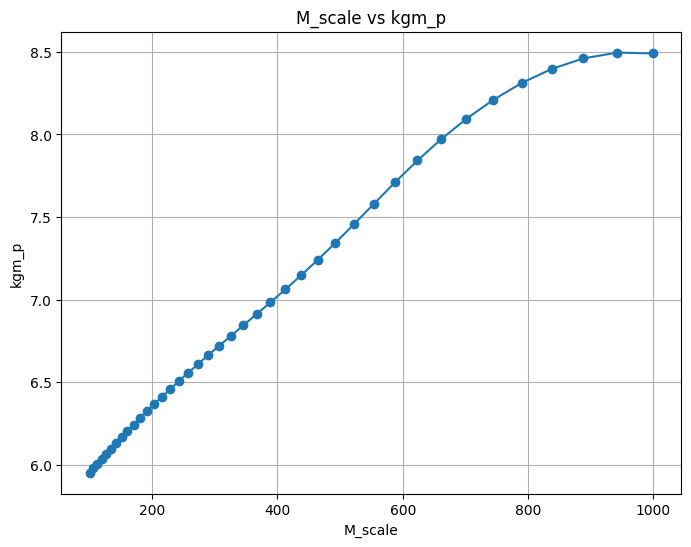

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(M_scale, kgm_p, marker='o')
plt.xlabel('M_scale')
plt.ylabel('kgm_p')
plt.title('M_scale vs kgm_p')
plt.grid(True)
plt.show()


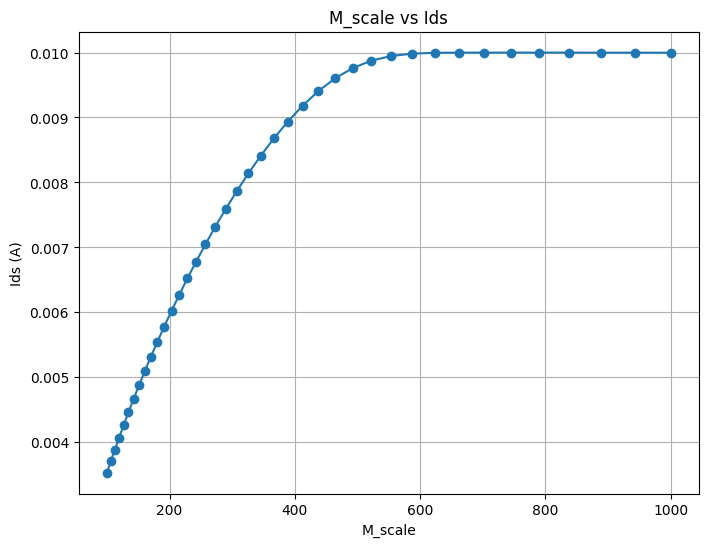

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(M_scale, ids, marker='o')
plt.xlabel('M_scale')
plt.ylabel('Ids (A)')
plt.title('M_scale vs Ids')
plt.grid(True)
plt.show()

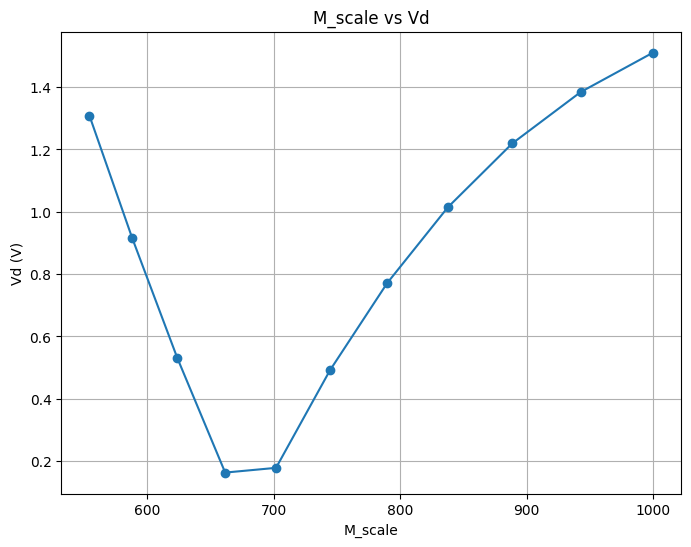

In [116]:

mask_vd = (vd >= 0) & (vd <= 1.6)
M_scale_filtered = M_scale[mask_vd]
vd_filtered = vd[mask_vd]

plt.figure(figsize=(8, 6))
plt.plot(M_scale_filtered, vd_filtered, marker='o')
plt.xlabel('M_scale')
plt.ylabel('Vd (V)')
plt.title('M_scale vs Vd')
plt.grid(True)
plt.show()

In [117]:
# Find index where both ids is closest to 10mA and vd is closest to 1.2V
idx_both = ((ids - 0.01).abs() + (vd - 1.2).abs()).idxmin()
M_scale_both = M_scale.loc[idx_both]

print(f"M_scale where ids is closest to 10mA and Vd is closest to 1.2V: {M_scale_both:.4f}")


M_scale where ids is closest to 10mA and Vd is closest to 1.2V: 888.6238


In [118]:
## Estimating gm and gds at M_scale_both
kgm_interp = interp1d(M_scale, kgm_p, kind='linear', fill_value='extrapolate')
gm_p_both = float(kgm_interp(M_scale_both)) * 0.01  # in Siemens
print(f"gm_p at M_scale {M_scale_both:.4f}: {gm_p_both*1e3:.3f} mS")
kgds_interp = interp1d(M_scale, kgds_p, kind='linear', fill_value='extrapolate')
gds_p_both = float(kgds_interp(M_scale_both)) * 0.01  # in Siemens
print(f"gds_p at M_scale {M_scale_both:.4f}: {gds_p_both*1e3:.3f} mS")  # in Siemens

gm_p at M_scale 888.6238: 84.611 mS
gds_p at M_scale 888.6238: 3.366 mS


In [119]:
## Estimating the caps at M_scale_both
kcgd_interp = interp1d(M_scale, kcgd_p, kind='linear', fill_value='extrapolate')
cgd_p_both = float(kcgd_interp(M_scale_both)) * 0.01  # in Farads
print(f"kcgd_p at M_scale {M_scale_both:.4f}: {cgd_p_both*1e15:.3f} fF")
kcgs_interp = interp1d(M_scale, kcsg_p, kind='linear', fill_value='extrapolate')
cgs_p_both = float(kcgs_interp(M_scale_both)) * 0.01  # in Farads
print(f"kcgs_p at M_scale {M_scale_both:.4f}: {cgs_p_both*1e15:.3f} fF")

kcgd_p at M_scale 888.6238: 386.141 fF
kcgs_p at M_scale 888.6238: 948.920 fF


In [124]:
## Bandwidth target and Reff estimate

BW_target = 2e6  # 2MHz
Vout_LDO = 1.2
Reff_max = 1 / (2 * np.pi * BW_target * C_load_eff)
print(f"Effective max Resistance (Reff) for bandwidth target {BW_target:.1f} Hz: {Reff_max:.2f} Ohms")

rds_p = 1 / gds_p_both
print(f"Rds of the pass transistor at M_scale {M_scale_both:.4f}: {rds_p:.2f} Ohms")

## R_L estimate based on <1% current overhead due to R_L

I_R_L = 0.01*I_max  # 1% of I_max
R_L = Vout_LDO / I_R_L
print(f"Load Resistance (R_L) for 1% current overhead at I_max: {R_L:.2f} Ohms")

R_L_eff = 1 / (1/R_L + 1/rds_p)
print(f"Effective Load Resistance (R_L_eff) considering Rds: {R_L_eff:.2f} Ohms")

f_bw = 1 / (2 * np.pi * R_L_eff * C_load_eff)
print(f"Bandwidth (f_bw) considering Rds: {f_bw/1e6:.2f} MHz")

A_v = gm_p_both/gds_p_both
print(f"Bandwidth (f_bw) considering Rds: {f_bw/1e6:.2f} MHz")
print(f"Voltage Gain (A_v) at M_scale {M_scale_both:.4f}: {A_v:.2f} V/V")

C_load_eff = C_Load + cgd_p_both * (1 + (1 / A_v)) 
print(f"Effective Load Capacitance at I_min: {C_load_eff*1e12:.3f} pF")

C_in_min = cgs_p_both + cgd_p_both * (1 + A_v)
print(f"Effective Input Capacitance at I_min including Miller effect: {C_in_min*1e12:.3f} pF")

# Estimate R_L required to meet the bandwidth target
R_L_bw = 1 / (2 * np.pi * BW_target * C_load_eff)
print(f"Load Resistance (R_L) required for bandwidth target {BW_target:.1f} Hz: {R_L_bw:.2f} Ohms")

Effective max Resistance (Reff) for bandwidth target 2000000.0 Hz: 792.23 Ohms
Rds of the pass transistor at M_scale 888.6238: 297.07 Ohms
Load Resistance (R_L) for 1% current overhead at I_max: 12000.00 Ohms
Effective Load Resistance (R_L_eff) considering Rds: 289.89 Ohms
Bandwidth (f_bw) considering Rds: 5.47 MHz
Bandwidth (f_bw) considering Rds: 5.47 MHz
Voltage Gain (A_v) at M_scale 888.6238: 25.14 V/V
Effective Load Capacitance at I_min: 100.402 pF
Effective Input Capacitance at I_min including Miller effect: 11.041 pF
Load Resistance (R_L) required for bandwidth target 2000000.0 Hz: 792.59 Ohms


In [127]:
## Assuming Vin_DC for the error amplifier is 0.9V
Vin_DC_amp = 0.9
Vout_LDO = 1.2

R_L = R_L_bw
R_L1 = ((Vout_LDO - Vin_DC_amp) / Vout_LDO)*R_L
print(f"R_L1 to drop {(Vout_LDO - Vin_DC_amp):.2f} V at I_max: {R_L1:.3f} Ohms")
R_L2 = R_L - R_L1
print(f"R_L2 to drop {Vin_DC_amp:.2f} V at I_max: {R_L2:.3f} Ohms")

R_L1 to drop 0.30 V at I_max: 198.148 Ohms
R_L2 to drop 0.90 V at I_max: 594.444 Ohms
